# Load and understand Data

Text(0, 0.5, 'Number of Publications')

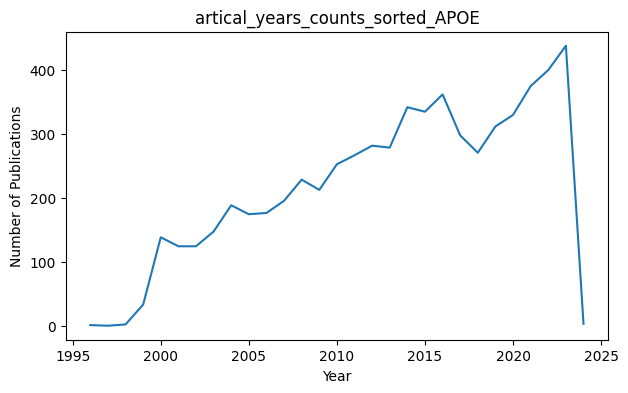

In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

article = pd.read_csv("articles.APOE.csv")
artical_years_counts = article['Year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(7, 4))
artical_years_counts.plot()
plt.title('artical_years_counts_sorted_APOE')
plt.xlabel('Year')
plt.ylabel('Number of Publications')

<Figure size 700x400 with 0 Axes>

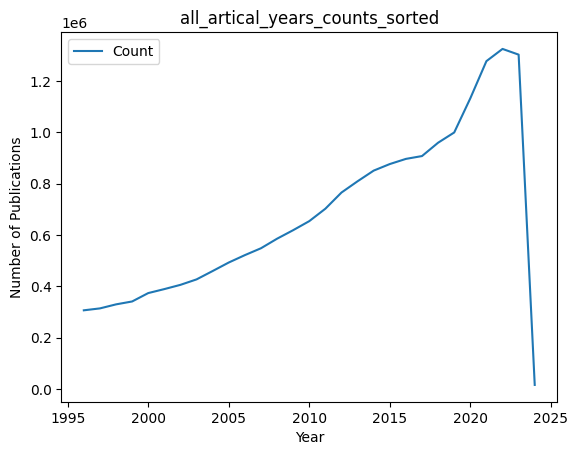

In [2]:
paper_count = pd.read_csv('paper_counts.csv')
paper_count = paper_count[paper_count['Year'] >= 1996]

# Create a line plot
plt.figure(figsize=(7, 4))
paper_count.plot(x = 'Year', y = 'Count')
plt.title('all_artical_years_counts_sorted')
plt.xlabel('Year')
plt.ylabel('Number of Publications')

# Show the plot
plt.show()

# Three ways to find active researchers

## 1st method: counting the number of articles published as first authors only

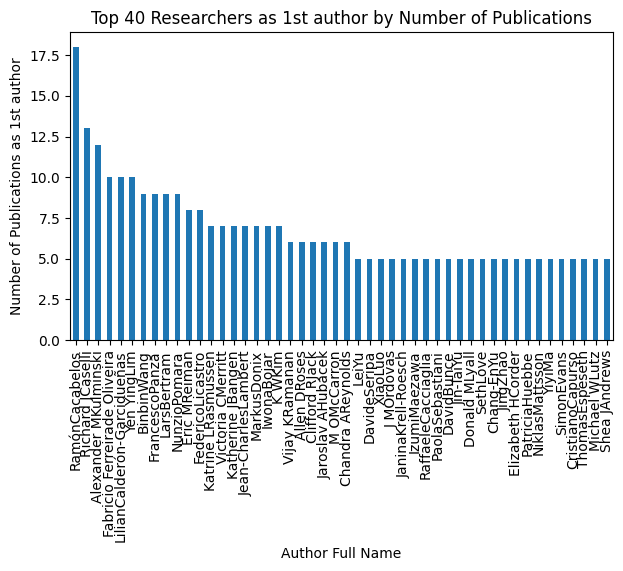

RamónCacabelos                  18
Richard JCaselli                13
Alexander MKulminski            12
Fabricio Ferreirade Oliveira    10
LilianCalderón-Garcidueñas      10
Yen YingLim                     10
BinbinWang                       9
FrancescoPanza                   9
LarsBertram                      9
NunzioPomara                     9
Eric MReiman                     8
FedericoLicastro                 8
Katrine LRasmussen               7
Victoria CMerritt                7
Katherine JBangen                7
Jean-CharlesLambert              7
MarkusDonix                      7
IwonaBojar                       7
K WKim                           7
Vijay KRamanan                   6
Allen DRoses                     6
Clifford RJack                   6
Jaroslav AHubacek                6
M OMcCarron                      6
Chandra AReynolds                6
LeiYu                            5
DavideSeripa                     5
XiaoLuo                          5
J MOrdovas          

In [3]:
# Create a new column contains the full name
article["fullname"] = article["FirstAuthorForename"] + article["FirstAuthorLastname"]

# Group by 'fullname' and count the number of publications for each author
author_publication_counts_1st = article['fullname'].value_counts()

# Select the top 10 authors with the most publications
top_48_authors = author_publication_counts_1st.head(48)

# Create a bar plot
plt.figure(figsize=(7, 4))
top_48_authors.plot(kind='bar')
plt.title('Top 40 Researchers as 1st author by Number of Publications')
plt.xlabel('Author Full Name')
plt.ylabel('Number of Publications as 1st author')
# Show the plot
plt.show()

top_48_authors

## 2nd method: counting the number of articles published as co-authors

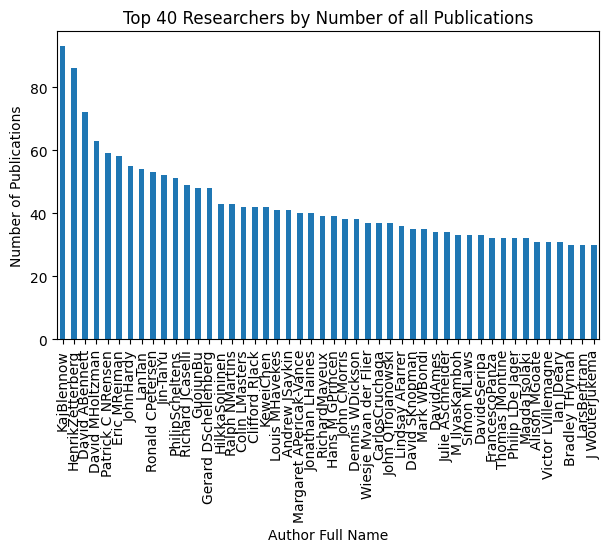

KajBlennow                 93
HenrikZetterberg           86
David ABennett             72
David MHoltzman            63
Patrick C NRensen          59
Eric MReiman               58
JohnHardy                  55
LanTan                     54
Ronald CPetersen           53
Jin-TaiYu                  52
PhilipScheltens            51
Richard JCaselli           49
GuojunBu                   48
Gerard DSchellenberg       48
HilkkaSoininen             43
Ralph NMartins             43
Colin LMasters             42
Clifford RJack             42
KeweiChen                  42
Louis MHavekes             41
Andrew JSaykin             41
Margaret APericak-Vance    40
Jonathan LHaines           40
RichardMayeux              39
Hans M GPrincen            39
John CMorris               38
Dennis WDickson            38
Wiesje Mvan der Flier      37
CarlosCruchaga             37
John QTrojanowski          37
Lindsay AFarrer            36
David SKnopman             35
Mark WBondi                35
DavidAmes 

In [8]:
authors = pd.read_csv('authors.APOE.csv')
authors["fullname"] = authors["AuthorForename"] + authors["AuthorLastname"]

# Group by 'fullname' and count the number of publications for each author
author_publication_counts_all = authors['fullname'].value_counts()

# Select the top 10 authors with the most publications
top_48_authors_all = author_publication_counts_all.head(48)

# Create a bar plot
plt.figure(figsize=(7,4))
top_48_authors_all.plot(kind='bar')
plt.title('Top 40 Researchers by Number of all Publications')
plt.xlabel('Author Full Name')
plt.ylabel('Number of Publications')


# Show the plot
plt.show()
top_48_authors_all

## 3rd method: combining the number of articles published as first author and co-author

In [21]:
authors_1st_index = top_48_authors.reset_index()
authors_all_index = top_48_authors_all.reset_index()

first_series = pd.Series(authors_1st_index["index"].values)
all_series = pd.Series(authors_all_index["index"].values)

df = pd.concat([first_series,all_series],axis=1)

df.columns = ['1st', 'all']
df["isin"] = df["1st"].isin(df["all"])
df


,1st,all,isin
0,RamónCacabelos,KajBlennow,False
1,Richard JCaselli,HenrikZetterberg,True
2,Alexander MKulminski,David ABennett,False
3,Fabricio Ferreirade Oliveira,David MHoltzman,False
4,LilianCalderón-Garcidueñas,Patrick C NRensen,False
5,Yen YingLim,Eric MReiman,False
6,BinbinWang,JohnHardy,False
7,FrancescoPanza,LanTan,True
8,LarsBertram,Ronald CPetersen,True
9,NunzioPomara,Jin-TaiYu,False


In [6]:
# Filter out rows whose isin column is True
isin_true = df[df['isin']]
print(isin_true["1st"])


1     Richard JCaselli
7       FrancescoPanza
8          LarsBertram
10        Eric MReiman
21      Clifford RJack
26        DavideSeripa
34           Jin-TaiYu
Name: 1st, dtype: object


In [20]:
# Convert Series to DataFrame
df_top_48_authors = top_48_authors.reset_index()
df_top_48_authors.columns = ['fullname', 'count_as_first_author']

df_top_48_authors_all = top_48_authors_all.reset_index()
df_top_48_authors_all.columns = ['fullname', 'count_as_co_author']

# merge DataFrame
merged_df = pd.merge(df_top_48_authors, df_top_48_authors_all, on='fullname', how='outer')

# Filter rows with both 'count_as_first_author' and 'count_as_co_author' non-null values
non_empty_rows = merged_df[merged_df['count_as_first_author'].notna() & merged_df['count_as_co_author'].notna()]

non_empty_rows

,fullname,count_as_first_author,count_as_co_author
1,Richard JCaselli,13.0,49.0
7,FrancescoPanza,9.0,32.0
8,LarsBertram,9.0,30.0
10,Eric MReiman,8.0,58.0
21,Clifford RJack,6.0,42.0
26,DavideSeripa,5.0,33.0
34,Jin-TaiYu,5.0,52.0


## Identifying persons active in recent years

In [ ]:
# It may be necessary to increase the number of personnel bases for the two basic methods to broaden the scope of screening



## Mapping relationships

In [22]:
# Based on the identified active researchers, a knowledge graph is drawn, 
# in which the researchers with connections are the active and collaborative researchers we are looking for.

